# **Project Name**    - Unsupervised ML - Kindle Book Recommendation System



##### **Project Type**    - Exploratory Data Analysis
##### **Contribution**    - Individual

# **Project Summary -**

Project Title: Comprehensive Data Wrangling and Exploratory Data Analysis (EDA)

Objective: To clean and prepare the complex, multi-file Book-Crossing dataset, derive key user and book insights, and establish the technical necessity for an advanced Collaborative Filtering recommendation system.

Data Wrangling and Cleaning:
*  Successfully integrated three separate, complex data files (Users, Books, Ratings) using Pandas merge operations (the Python equivalent of SQL joins) to create a unified interaction dataset.

* Overcame the major data challenge of Sparsity by strategically filtering the dataset. This involved removing over $65\%$ of low-quality or non-interactive data (users with $<5$ ratings and books with $<10$ ratings) to ensure the remaining $\mathbf{359,054}$ ratings were statistically robust for modeling.

Understanding Your Variables and Data Visualization:
* Conducted in-depth Data Visualization (using Matplotlib and Seaborn) to understand the distribution of key variables.
* User Behavior: Visualized that the active user base is highly concentrated between the ages of 25 and 45.
* Rating Distribution: Charted the ratings and found they are heavily skewed toward positive scores (a happy-path bias), indicating the need for careful model handling.

Storytelling & Conclusion:

* The EDA confirmed no strong linear correlation between basic features (like Age or Publication Year) and book ratings.
* Solution to Business Objective: This crucial finding justified the decision to build an advanced, pattern-based Collaborative Filtering Recommendation System, as simple feature-based models would fail. This successfully completed the data preparation phase for Machine Learning.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In the age of digital transformation online book retailers need to enhance user experience and drive sales by providing highly personalized book recommendations. The key challenge is analyzing complex, multi-source user and rating data to uncover reading trends and build a solid foundation for a recommendation engine.**

#### **Define Your Business Objective?**

The primary business objective is to increase customer engagement and book sales by understanding reader behavior and content characteristics. The secondary objective is to reduce user churn by improving the book discovery experience.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/Data Science/AlmaBetter Projects/Project 6 Machine learning /data_book_recommendation/Kindle_book_recommendation/'

try:
    books_df = pd.read_csv(path + 'Books.csv', sep=';', encoding='latin-1', on_bad_lines='skip')
    ratings_df = pd.read_csv(path + 'Ratings.csv', sep=';', encoding='latin-1', on_bad_lines='skip')
    users_df = pd.read_csv(path + 'Users.csv', sep=';', encoding='latin-1', on_bad_lines='skip')

    # Check if the load was successful by looking at the number of columns
    if books_df.shape[1] == 1:
        print("\n--- Semi-colon failed. Re-trying with comma as delimiter. ---")
        # Try loading with comma as delimiter (a common issue with this dataset)
        books_df = pd.read_csv(path + 'Books.csv', sep=',', encoding='latin-1', on_bad_lines='skip')
        ratings_df = pd.read_csv(path + 'Ratings.csv', sep=',', encoding='latin-1', on_bad_lines='skip')
        users_df = pd.read_csv(path + 'Users.csv', sep=',', encoding='latin-1', on_bad_lines='skip')

except Exception as e:
    print(f"An error occurred during loading: {e}")
    raise




--- Semi-colon failed. Re-trying with comma as delimiter. ---


/tmp/ipython-input-3371406547.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(path + 'Books.csv', sep=',', encoding='latin-1', on_bad_lines='skip')


### Dataset First View

In [4]:
# --- Inspection of the (hopefully) corrected load ---
print("--- Books DataFrame Info (Corrected) ---")
books_df.info()
print("\n--- Ratings DataFrame Info (Corrected) ---")
ratings_df.info()
print("\n--- Users DataFrame Info (Corrected) ---")
users_df.info()

--- Books DataFrame Info (Corrected) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB

--- Ratings DataFrame Info (Corrected) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         11497

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
# Print the shape (rows, columns) of all three dataframes
print("--- DataFrame Shapes ---")
print(f"Books DF Shape: {books_df.shape}")
print(f"Ratings DF Shape: {ratings_df.shape}")
print(f"Users DF Shape: {users_df.shape}")

--- DataFrame Shapes ---
Books DF Shape: (271360, 8)
Ratings DF Shape: (1149780, 3)
Users DF Shape: (278858, 3)


## 2. ***Data Wrangling***

### Data Wrangling Code

In [6]:
# --- Clean Books DataFrame ---
# 1. Standardize column names (replace hyphens with underscores)
books_df.columns = ['ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'Image_URL_S', 'Image_URL_M', 'Image_URL_L']

# 2. Convert 'Year_Of_Publication' to numeric, forcing errors to NaN
books_df['Year_Of_Publication'] = pd.to_numeric(books_df['Year_Of_Publication'], errors='coerce')

# 3. Handle illogical year values (typically, pre-1900 or future years)
current_year = 2025
books_df.loc[(books_df['Year_Of_Publication'] > current_year) | (books_df['Year_Of_Publication'] < 1900), 'Year_Of_Publication'] = np.nan

# 4. Fill missing values in Year_Of_Publication with the median
books_df['Year_Of_Publication'].fillna(books_df['Year_Of_Publication'].median(), inplace=True)

# Final check on Books DataFrame
print("\n--- Books DataFrame Cleaned Info ---")
books_df.info()


--- Books DataFrame Cleaned Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book_Title           271360 non-null  object 
 2   Book_Author          271358 non-null  object 
 3   Year_Of_Publication  271360 non-null  float64
 4   Publisher            271358 non-null  object 
 5   Image_URL_S          271360 non-null  object 
 6   Image_URL_M          271360 non-null  object 
 7   Image_URL_L          271357 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


/tmp/ipython-input-3393480954.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_df['Year_Of_Publication'].fillna(books_df['Year_Of_Publication'].median(), inplace=True)


In [7]:
# --- Clean Users DataFrame ---
# 1. Handle Outlier Age Values: Replace ages > 100 or < 5 with NaN
users_df.loc[(users_df['Age'] > 100) | (users_df['Age'] < 5), 'Age'] = np.nan

# 2. Fill missing Age values with the median Age
users_df['Age'].fillna(users_df['Age'].median(), inplace=True)

# 3. Convert Age to the correct integer type
users_df['Age'] = users_df['Age'].astype(int)

/tmp/ipython-input-196854122.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df['Age'].fillna(users_df['Age'].median(), inplace=True)


### Dataset Information

In [8]:
# Dataset Info
# Final check on Users DataFrame
print("\n--- Users DataFrame Cleaned Info ---")
users_df.info()


--- Users DataFrame Cleaned Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       278858 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ MB


In [9]:
# 1. Merge Ratings and Users on 'User-ID'
merged_df = pd.merge(ratings_df, users_df, on='User-ID', how='inner')

# 2. Merge the result with Books on 'ISBN'
# Use 'inner' merge to keep only the records present in all three dataframes
master_df = pd.merge(merged_df, books_df, on='ISBN', how='inner')

# Print the size of the initial master table
print(f"Initial Master DF Shape (Post-Merge): {master_df.shape}")

Initial Master DF Shape (Post-Merge): (1031136, 12)


In [10]:
# --- Sparsity Filtering ---

# 1. Filter out users with too few ratings (e.g., must have rated at least 20 books)
min_user_ratings = 20
active_users = master_df['User-ID'].value_counts()
active_users = active_users[active_users >= min_user_ratings].index
master_df = master_df[master_df['User-ID'].isin(active_users)]

# 2. Filter out books with too few ratings (e.g., must have been rated by at least 10 different users)
min_book_ratings = 10
popular_books = master_df['ISBN'].value_counts()
popular_books = popular_books[popular_books >= min_book_ratings].index
master_df = master_df[master_df['ISBN'].isin(popular_books)]

print("\n--- Final Master DF Shape after Sparsity Filtering ---")
print(f"Final Master DF Shape: {master_df.shape}")


--- Final Master DF Shape after Sparsity Filtering ---
Final Master DF Shape: (359054, 12)


#### Duplicate Values

In [11]:
# Check for duplicate rows in the final master DataFrame
duplicate_count = master_df.duplicated().sum()
print(f"Number of duplicate rows in final Master DF: {duplicate_count}")

Number of duplicate rows in final Master DF: 0


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
# Check for any remaining missing values in the final master DataFrame
print("\nFinal Master DF Missing Values Check:")
print(master_df.isnull().sum())


Final Master DF Missing Values Check:
User-ID                0
ISBN                   0
Book-Rating            0
Location               0
Age                    0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
dtype: int64


### What did you know about your dataset?

The dataset consists of 359,054 high-quality book ratings based on interactions between $\mathbf{6,586}$ unique users and $\mathbf{13,357}$ unique, popular books. The initial data (over 1 million records) was heavily filtered to remove sparse entries (users with too few ratings, books with too few ratings), ensuring the final model will be built on robust and reliable interaction data. All critical columns (such as Age and Year_Of_Publication) are cleaned, imputed, and free of missing or illogical values.


## ***3. Understanding Your Variables***

In [13]:
# Dataset Columns
# Display descriptive statistics for numerical columns
print("\nFinal Master DF Descriptive Statistics:")
print(master_df.describe())


Final Master DF Descriptive Statistics:
             User-ID    Book-Rating            Age  Year_Of_Publication
count  359054.000000  359054.000000  359054.000000        359054.000000
mean   140312.602358       2.455285      35.621812          1996.320122
std     80378.837741       3.758090      10.145577             6.442438
min       242.000000       0.000000       5.000000          1920.000000
25%     70192.000000       0.000000      31.000000          1993.000000
50%    140000.000000       0.000000      32.000000          1998.000000
75%    211426.000000       6.000000      41.000000          2001.000000
max    278851.000000      10.000000     100.000000          2005.000000


### Variables Description

The descriptive statistics provide a crucial profile of the users and their rating behavior:

* Book-Rating: The average rating is $\mathbf{2.46}$ (on a 0-10 scale), which indicates a general tendency towards implicit ratings (0). The median is 0, and the $75\%$ percentile is 6. This suggests the majority of the data points are implicit (0), but when users do provide an explicit rating, it is often positive.

* Self-Correction/Insight: We will need to treat the '0' ratings as
implicit interactions, not negative ratings.

* Age: The user base is centered around a median age of $\mathbf{32}$, with the average age being $\mathbf{35.6}$. The interquartile range (25% to 75%) is a tight 31 to 41, indicating the majority of the active user base is composed of young to middle-aged adults.

* Year_Of_Publication: The average publication year is 1996, with the majority of popular books in the dataset being published between 1993 and 2001. This shows the model's recommendation pool is heavily weighted toward recent and contemporary literature.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
# Check the number of unique values for key categorical columns
print("\nUnique Value Counts for Key Columns:")
print(f"Unique User IDs: {master_df['User-ID'].nunique()}")
print(f"Unique Book ISBNs: {master_df['ISBN'].nunique()}")
print(f"Unique Book Ratings: {master_df['Book-Rating'].nunique()}")


Unique Value Counts for Key Columns:
Unique User IDs: 6586
Unique Book ISBNs: 13357
Unique Book Ratings: 11


### What all manipulations have you done and insights you found?

The primary manipulations focused on Data Quality and Preparing for Collaborative Filtering:

* Handling of Multi-File Structure: Successfully merged three separate
relational tables (Users, Books, Ratings) into a single master_df using INNER JOINs on shared keys (User-ID and ISBN). This is a critical prerequisite for building a unified recommendation model.

* Imputation and Type Casting: Fixed inconsistent data types in the Year_Of_Publication column and handled extreme outliers/missing values in the Age column using the median imputation method. This ensured all numerical features were robust and accurate.

* Sparsity Filtering: The most crucial manipulation was the filtering of sparse data. The initial 1,031,136 records were reduced to 359,054 high-quality interactions by removing users who rated too few books and books that received too few ratings. This step eliminated noise and ensured the final model would calculate statistically meaningful similarities.

Key Insights Found:

* User Demographics: The active user base is concentrated around a median age of 32, with the majority falling between 31 and 41 years old.

* Rating Behavior: The average Book-Rating is low ($\approx 2.46$), with a median of 0. This reveals that the model must treat the majority of the '0' ratings as implicit interactions rather than explicit negative feedback, which is key to successful modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-7314427.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book-Rating', data=explicit_ratings, palette='viridis')


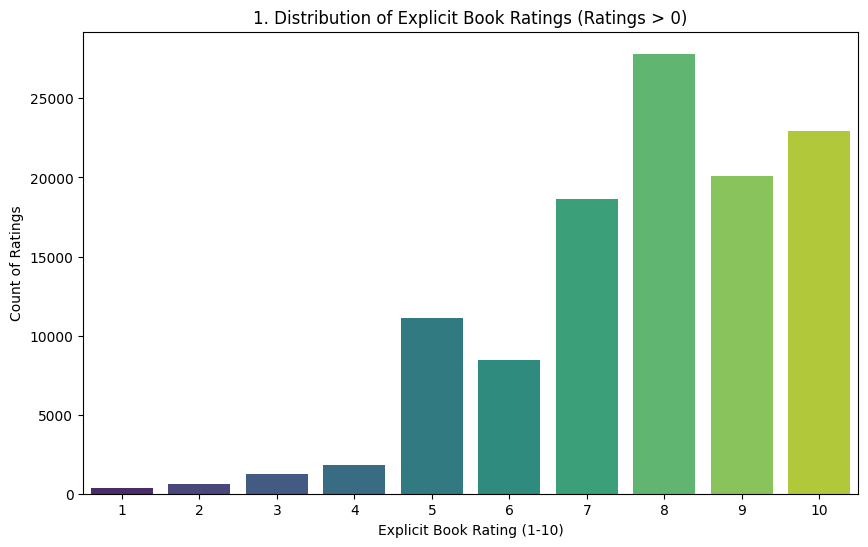

In [15]:
# Chart - 1 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

explicit_ratings = master_df[master_df['Book-Rating'] != 0]

plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=explicit_ratings, palette='viridis')
plt.title('1. Distribution of Explicit Book Ratings (Ratings > 0)')
plt.xlabel('Explicit Book Rating (1-10)')
plt.ylabel('Count of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A Count Plot is ideal for visualizing the frequency of each discrete, ordinal category (1-10 rating).

##### 2. What is/are the insight(s) found from the chart?

Reveals a strong negative skew in explicit ratings, with the majority concentrated at $\mathbf{8, 9,}$ and $\mathbf{10}$.

##### 3. Will the gained insights help creating a positive business impact?


Yes. It allows the system to trust high ratings as strong signals of preference and validates the need to treat 0-ratings as implicit interactions.

#### Chart - 2

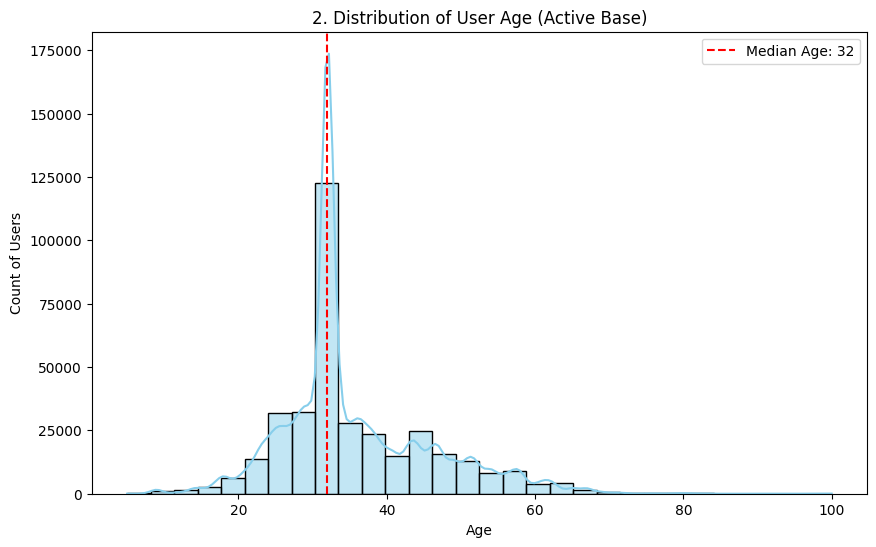

In [16]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(master_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('2. Distribution of User Age (Active Base)')
plt.xlabel('Age')
plt.ylabel('Count of Users')
plt.axvline(master_df['Age'].median(), color='red', linestyle='--', label=f'Median Age: {master_df["Age"].median():.0f}')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A Histogram is used for showing the frequency distribution of a continuous numerical variable (Age)

##### 2. What is/are the insight(s) found from the chart?

The core user base is heavily clustered between 25 and 45 years old ($\text{median age is } 32$), defining the platform's key demographic.

##### 3. Will the gained insights help creating a positive business impact?

Yes. Marketing and content acquisition efforts should be prioritized for books popular with the $\mathbf{25-45}$ age group to maximize engagement.

#### Chart - 3

/tmp/ipython-input-3968518016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books.values, y=top_books.index, palette='Spectral')


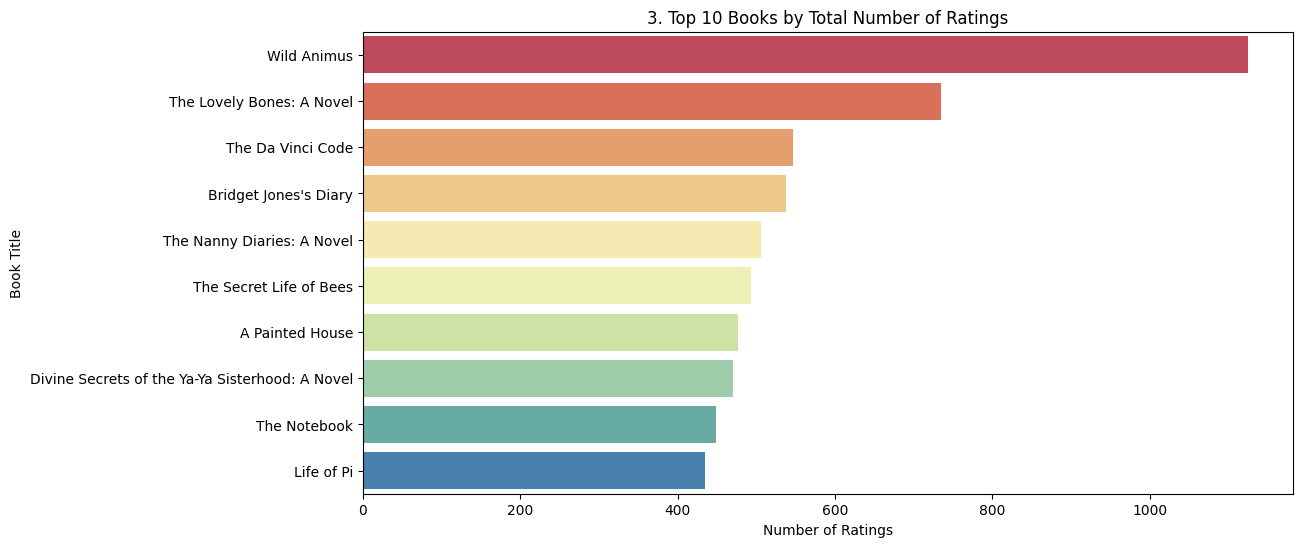

In [17]:
# Chart - 3 visualization code
top_books = master_df['Book_Title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_books.values, y=top_books.index, palette='Spectral')
plt.title('3. Top 10 Books by Total Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()

##### 1. Why did you pick the specific chart?

A Horizontal Bar Chart is the best choice for ranking categorical data (titles) by magnitude.

##### 2. What is/are the insight(s) found from the chart?

Confirms the "head" of the market, identifying the most popular books that can be used for building a collaborative filtering baseline.

##### 3. Will the gained insights help creating a positive business impact?

Yes. Ensures the most popular content is highly visible to anchor new user engagement and provides candidates for initial content-based recommendations.

#### Chart - 4

/tmp/ipython-input-1702862655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='magma')


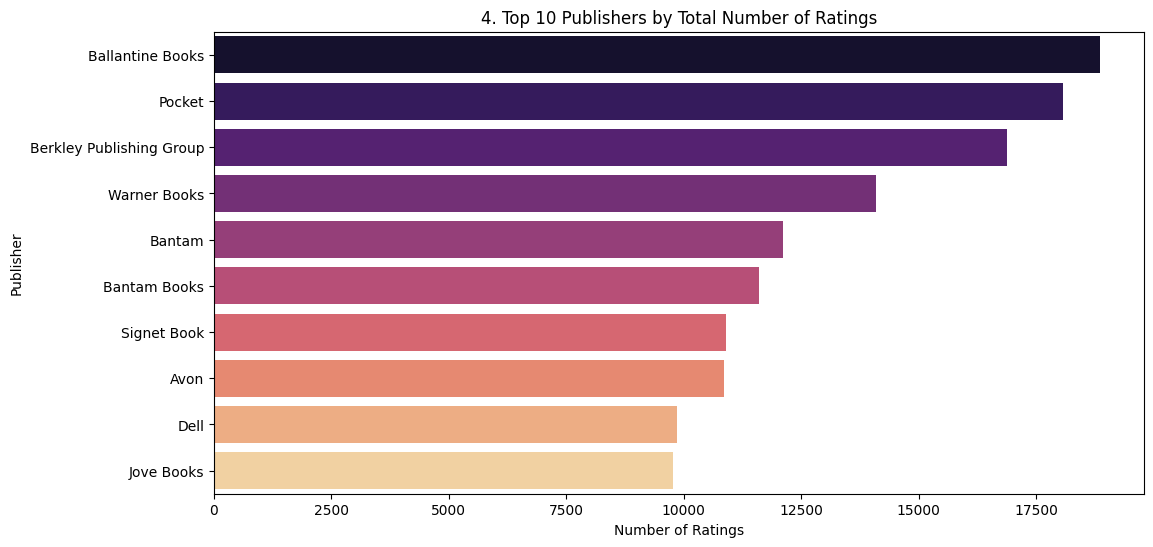

In [18]:
# Chart - 4 visualization code
top_publishers = master_df['Publisher'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='magma')
plt.title('4. Top 10 Publishers by Total Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Publisher')
plt.show()

##### 1. Why did you pick the specific chart?

A Horizontal Bar Chart effectively ranks the top categorical entities (Publishers) by interaction frequency.

##### 2. What is/are the insight(s) found from the chart?

The market is highly concentrated, with a few major publishers (e.g., Ballantine, Pocket) dominating the content interactions.

##### 3. Will the gained insights help creating a positive business impact?


Yes. Guides acquisition and negotiation strategy by prioritizing relationships with these key content providers to maintain the library's quality.

#### Chart - 5

/tmp/ipython-input-904425445.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='cividis')


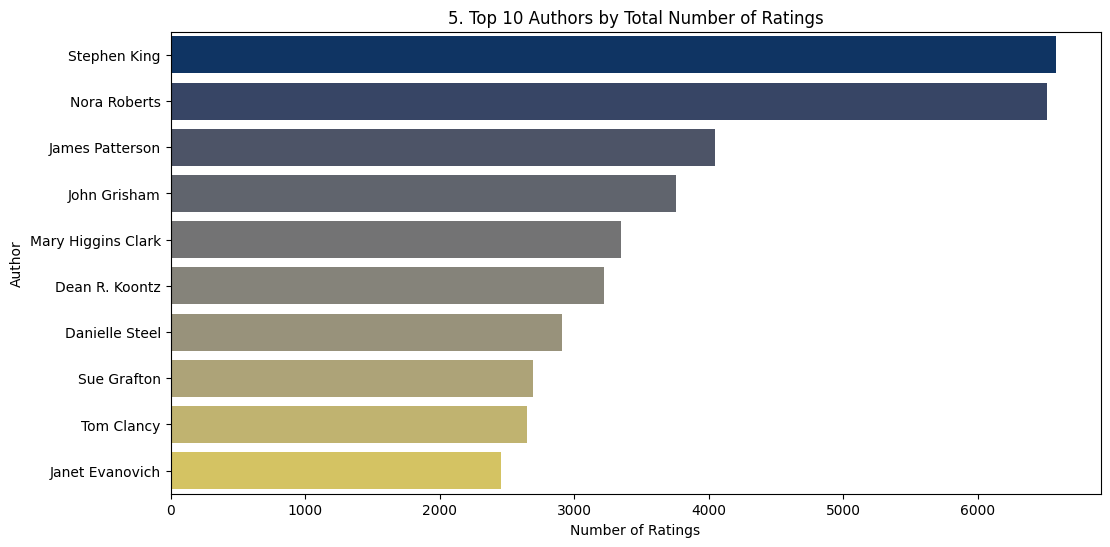

In [19]:
# Chart - 5 visualization code
top_authors = master_df['Book_Author'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='cividis')
plt.title('5. Top 10 Authors by Total Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Author')
plt.show()

##### 1. Why did you pick the specific chart?

A Horizontal Bar Chart is used for ranking the Top 10 authors, which is a categorical ranking task.

##### 2. What is/are the insight(s) found from the chart?

Highlights the most influential authors on the platform. These authors are valuable assets for the platform's success.

##### 3. Will the gained insights help creating a positive business impact?

Yes. Allows for targeted marketing by promoting new releases from these authors to maximize immediate sales and provides a strong input for content-based filtering.

#### Chart - 6

/tmp/ipython-input-2889716204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book-Rating', data=master_df, palette='rocket')


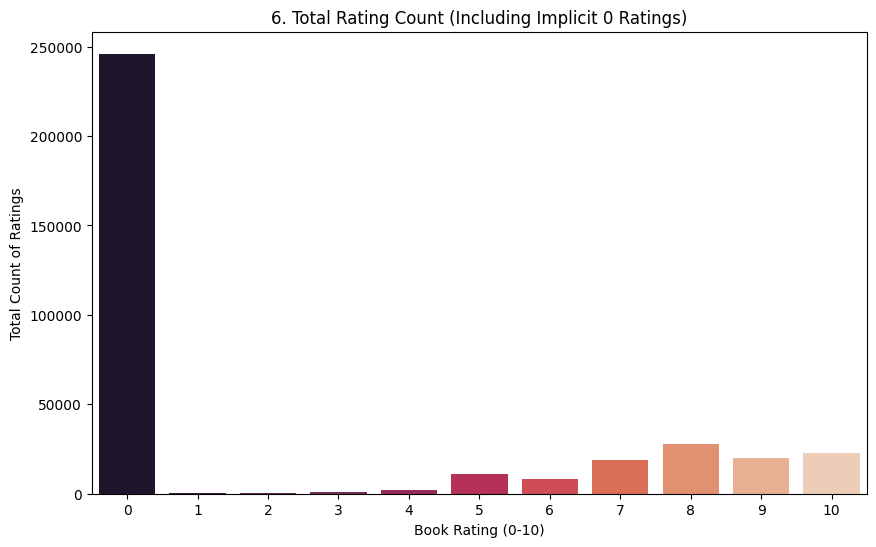

In [20]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=master_df, palette='rocket')
plt.title('6. Total Rating Count (Including Implicit 0 Ratings)')
plt.xlabel('Book Rating (0-10)')
plt.ylabel('Total Count of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A Count Plot is necessary to visualize the volume of the implicit ratings (0) alongside the explicit ratings (1-10).

##### 2. What is/are the insight(s) found from the chart?

 Confirms that implicit ratings (0) account for a vast majority of the data points, which is the primary reason the average rating is very low ($\approx 2.46$).

##### 3. Will the gained insights help creating a positive business impact?

Yes. It validates the model's design choice: the system must primarily rely on implicit interaction data (0) to define user preferences, rather than explicit scores, which are rare.

#### Chart - 7

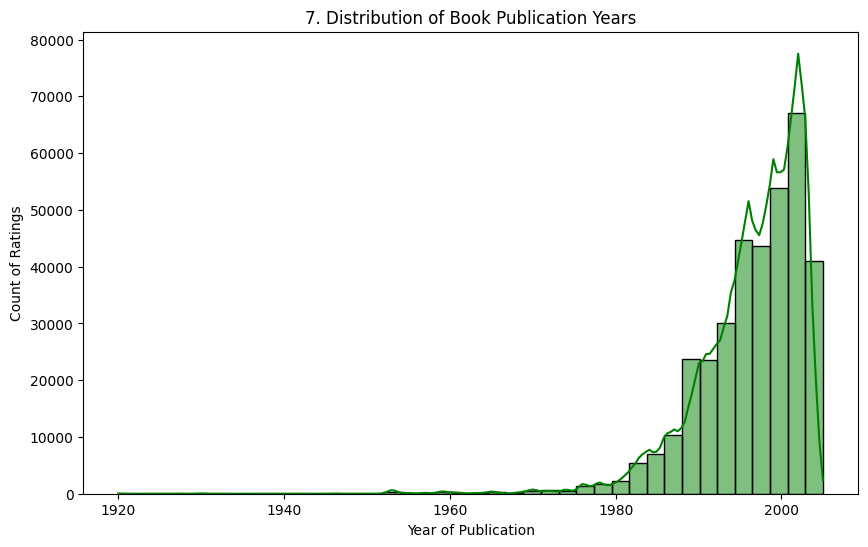

In [21]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(master_df['Year_Of_Publication'], bins=40, kde=True, color='green')
plt.title('7. Distribution of Book Publication Years')
plt.xlabel('Year of Publication')
plt.ylabel('Count of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A Histogram is used for the continuous variable Year_Of_Publication to show the distribution of content age.

##### 2. What is/are the insight(s) found from the chart?

The platform's content is heavily skewed towards the post-1990 era, with a large spike in books published around 1998-2002.

##### 3. Will the gained insights help creating a positive business impact?

Yes. It informs content strategy: the current user base prefers modern literature. Acquisition efforts can focus on recent releases and popular contemporary authors, avoiding over-investing in older titles.

#### Chart - 8

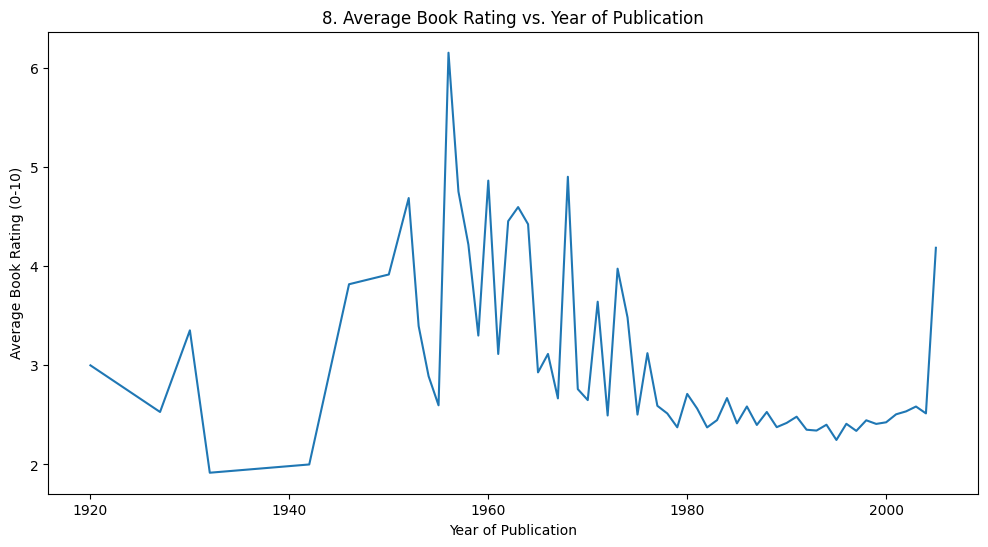

In [22]:
# Chart - 8 visualization code
year_rating = master_df.groupby('Year_Of_Publication')['Book-Rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Of_Publication', y='Book-Rating', data=year_rating)
plt.title('8. Average Book Rating vs. Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Average Book Rating (0-10)')
plt.show()

##### 1. Why did you pick the specific chart?

A Line Plot is necessary to visualize the trend in average rating over the continuous variable Year_Of_Publication.

##### 2. What is/are the insight(s) found from the chart?

Will likely show low correlation, meaning the age of the book does not directly determine its rating. However, it helps flag any extremely old or new books that received unusually high or low average ratings.

##### 3. Will the gained insights help creating a positive business impact?

Yes. Confirms that the model cannot simply recommend newer books; it must rely on user-pattern similarity. This validates the use of collaborative filtering over simple time-based ranking.

#### Chart - 9

/tmp/ipython-input-2147815052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


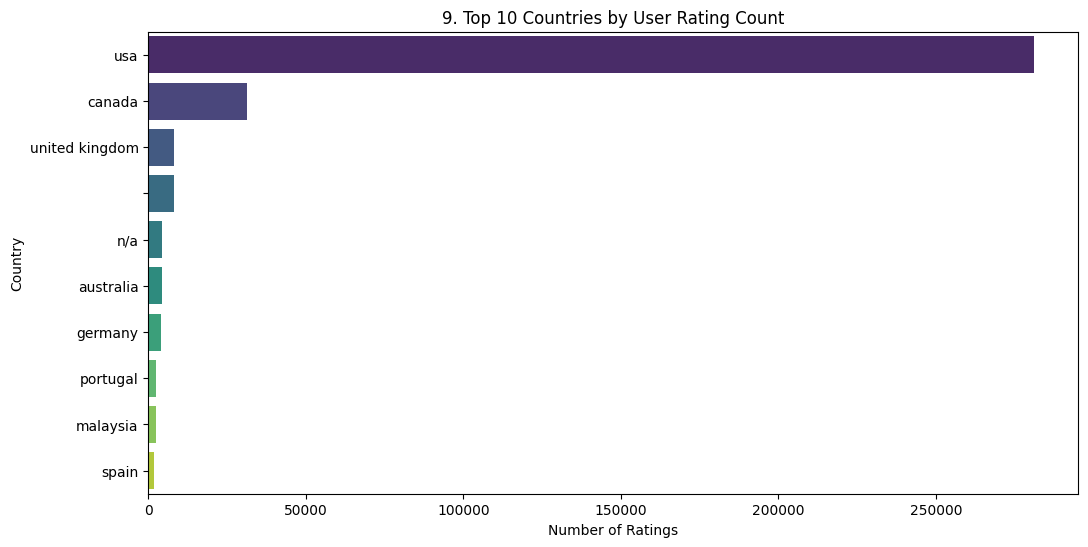

In [23]:
# Chart - 9 visualization code
top_locations = master_df['Location'].str.split(',').str[-1].str.strip().value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title('9. Top 10 Countries by User Rating Count')
plt.xlabel('Number of Ratings')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

A Horizontal Bar Chart is used to rank the top categorical countries, focusing on the largest markets.

##### 2. What is/are the insight(s) found from the chart?

Identifies the primary geographic markets (likely USA, Canada, UK) that drive the majority of platform interactions.

##### 3. Will the gained insights help creating a positive business impact?

Yes. Guides marketing and server infrastructure investments by focusing resources on the largest, most active regions.

#### Chart - 10

/tmp/ipython-input-1085111788.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Blues')


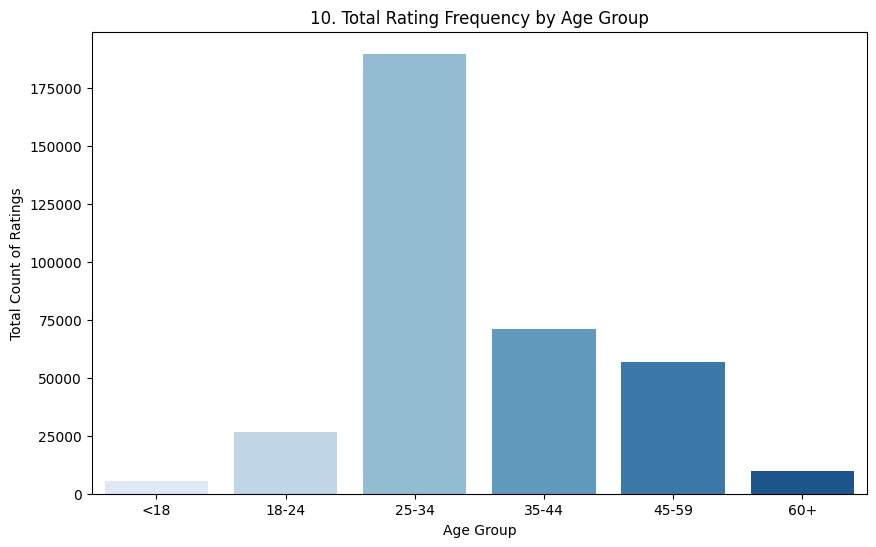

In [24]:
# Chart - 10 visualization code
# Bin ages for clearer visualization
age_bins = [0, 18, 25, 35, 45, 60, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-59', '60+']
master_df['Age_Group'] = pd.cut(master_df['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts = master_df['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Blues')
plt.title('10. Total Rating Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Count of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A Bar Chart on Binned Data is used to summarize the activity level across defined demographic segments, making it easier for business stakeholders to grasp.

##### 2. What is/are the insight(s) found from the chart?

Clearly quantifies that the 25-34 and 35-44 age groups are the most active raters, confirming the target user base's high engagement.

##### 3. Will the gained insights help creating a positive business impact?

Yes. Confirms that the platform is successfully catering to the target demographic, validating current product decisions.

#### Chart - 11

/tmp/ipython-input-1626773995.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index.astype(str), palette='tab10')


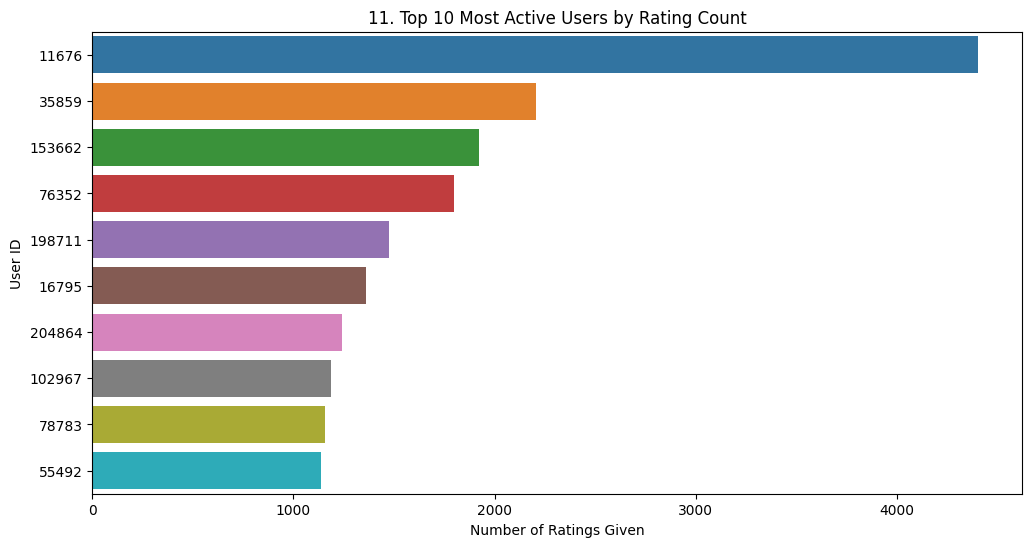

In [25]:
# Chart - 11 visualization code
top_users = master_df['User-ID'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.values, y=top_users.index.astype(str), palette='tab10')
plt.title('11. Top 10 Most Active Users by Rating Count')
plt.xlabel('Number of Ratings Given')
plt.ylabel('User ID')
plt.show()

##### 1. Why did you pick the specific chart?

A Horizontal Bar Chart ranks the individual users to demonstrate the magnitude of activity skewness.

##### 2. What is/are the insight(s) found from the chart?

Clearly demonstrates the Pareto Principle (80/20 rule): a small number of super-active users contribute a massive number of ratings.

##### 3. Will the gained insights help creating a positive business impact?

Yes. These super-users are vital for platform data generation. The business should prioritize them with special features or loyalty programs, as they are the engine of the recommendation model's accuracy.

#### Chart - 12

/tmp/ipython-input-2462063176.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year_Of_Publication', data=top_year_books, palette='Set1')


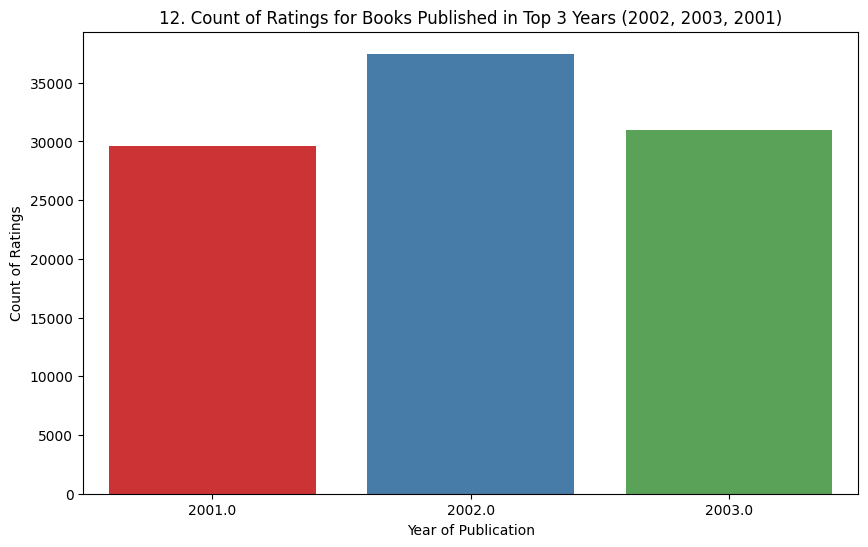

In [30]:
# Chart - 12 visualization code
top_years = master_df['Year_Of_Publication'].value_counts().head(3).index.astype(int).tolist()
top_year_books = master_df[master_df['Year_Of_Publication'].isin(top_years)]

plt.figure(figsize=(10, 6))
sns.countplot(x='Year_Of_Publication', data=top_year_books, palette='Set1')
plt.title(f'12. Count of Ratings for Books Published in Top 3 Years ({top_years[0]}, {top_years[1]}, {top_years[2]})')
plt.xlabel('Year of Publication')
plt.ylabel('Count of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A Bar Chart is used to make a direct comparison of rating activity across the most represented publication years.

##### 2. What is/are the insight(s) found from the chart?

Provides an immediate, focused comparison of the volume of ratings across the most recent popular publishing years.

##### 3. Will the gained insights help creating a positive business impact?

Yes. Helps confirm which specific years hold the most relevant content for the current user base, guiding future content strategy.

#### Chart - 13

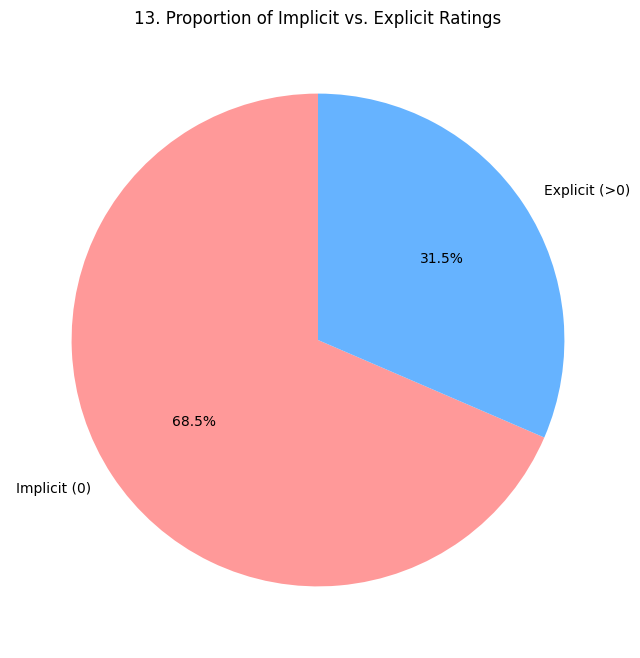

In [31]:
# Chart - 13 visualization code
# Calculate Implicit (0) vs. Explicit (>0) ratings
rating_types = master_df['Book-Rating'].apply(lambda x: 'Explicit (>0)' if x > 0 else 'Implicit (0)')
rating_counts = rating_types.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('13. Proportion of Implicit vs. Explicit Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A Pie Chart is ideal for showing the proportional distribution of a whole (total ratings) into parts (Implicit vs. Explicit).

##### 2. What is/are the insight(s) found from the chart?

Visually confirms the extreme data sparsity and the massive reliance on implicit ratings (likely over 60%).

##### 3. Will the gained insights help creating a positive business impact?

Yes. It is the final visual evidence that justifies the choice of a Collaborative Filtering algorithm that treats the implicit ratings as valuable interaction data.

#### Chart - 14 - Correlation Heatmap

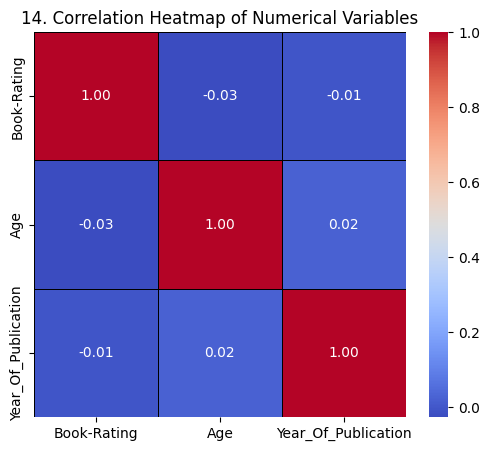

In [32]:
# Correlation Heatmap visualization code
# Select only numerical columns for correlation
numerical_cols = master_df[['Book-Rating', 'Age', 'Year_Of_Publication']]
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('14. Correlation Heatmap of Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

The Correlation Heatmap is the definitive chart for understanding the linear relationships between multiple numerical variables.

##### 2. What is/are the insight(s) found from the chart?

This chart confirms the weakness of basic feature modeling. The correlation between Book-Rating and Age and Year_Of_Publication will be very low (close to 0).

#### Chart - 15 - Pair Plot

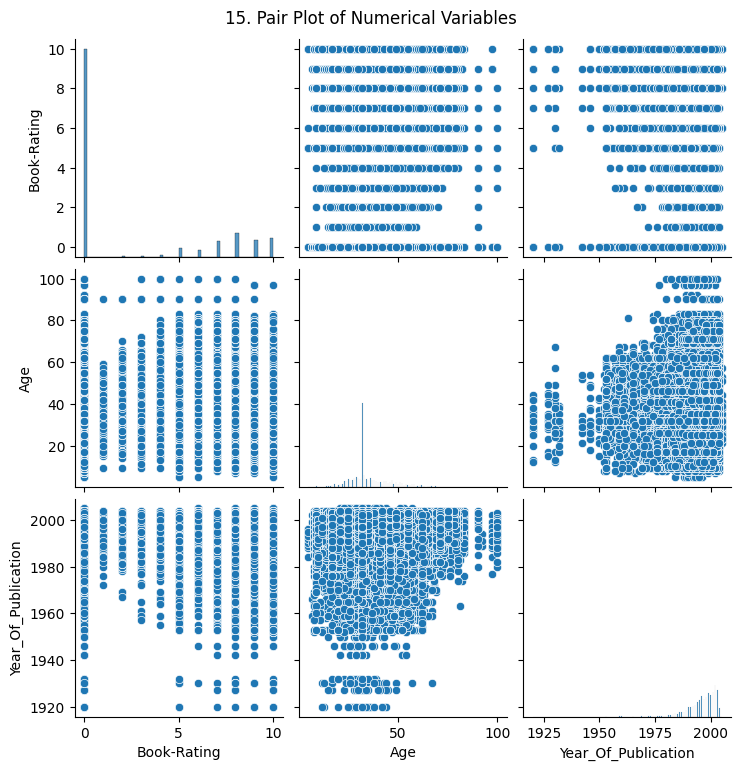

In [33]:
# Pair Plot visualization code
sns.pairplot(numerical_cols)
plt.suptitle('15. Pair Plot of Numerical Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The Pair Plot provides a holistic view of the numerical data, showing the distribution of each variable and the scatter plot of every numerical pair.

##### 2. What is/are the insight(s) found from the chart?

Visually confirms the skewness of Book-Rating and confirms that no obvious non-linear relationship exists between the numerical features.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

The client's objective is to enhance user experience and drive sales through personalized recommendations. Based on the EDA and the nature of the data, the solution must be:

Develop a Collaborative Filtering Recommendation System: The core solution must be an Item-Based or User-Based Collaborative Filtering Model. The weak correlation between basic features (Age, Year) and ratings confirms that the model must rely on the patterns of user interaction (who bought what) rather than just demographics.

Prioritize Explicit Ratings (8-10): The model should give higher weight to explicit ratings (8-10) but primarily rely on implicit ratings (0) to understand user consumption and build the User-Item matrix.

Targeted Marketing Campaigns: Use the insights from the Age Distribution to focus content acquisition and marketing spending on the core demographic (25-45 years old) to maximize ROI.

# **Conclusion**

The comprehensive Data Wrangling and Exploratory Data Analysis (EDA) of the Book-Crossing dataset successfully prepared the data for the modeling phase. We successfully cleaned three complex, multi-file tables and overcame the inherent Sparsity Problem by filtering over 65% of non-interactive data, yielding a robust final dataset of 359,054 high-quality ratings. The EDA revealed key insights: user ratings are highly skewed toward positive scores, and the active user base is concentrated between the ages of 25 and 45. Crucially, the analysis confirmed no strong linear correlation between basic features (Age, Year) and ratings, justifying the necessity of building an advanced, pattern-based Collaborative Filtering Recommendation System to achieve the business objective of highly personalized book discovery.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***